# Import packages and data

In [1]:
##packages
import numpy as np 
import pandas as pd 
from scipy.stats import randint 
import matplotlib.pyplot as plt 
import seaborn as sns 

from pandas import set_option

plt.style.use('ggplot')

In [4]:
##data loading 

data=pd.read_csv("../data/raw/CreditTraining.csv")

data

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
5,3858,0,Existing Client,04/03/1983,15/09/2011,NP_Client,University,Married,0.0,28,60,2.0,C,04/10/2011,Sales,Old rent,1,NaN,C
6,2189,0,Non Existing Client,25/09/1979,17/07/2011,NP_Client,University,Married,0.0,10,36,1.0,C,28/07/2011,Sales,Owned,1,NaN,B
7,9338,0,Non Existing Client,04/10/1953,11/04/2012,NP_Client,University,Married,0.0,15,36,1.0,C,12/04/2012,Sales,Owned,1,16/04/2013,B
8,9578,0,Existing Client,01/03/1974,20/02/2001,NP_Client,University,Single,0.0,0,500,3.0,P,02/04/2012,Branch,Owned,1,NaN,E
9,173,1,Existing Client,13/02/1963,27/04/2011,NP_Client,University,Married,4.0,35,"87,6",2.0,C,03/05/2011,Sales,Owned,1,18/11/2012,L


Many variables must to be converted into numerical variables

# Features engineering 

In [12]:
y=data.Y ## The targets

features=data.drop("Y",axis=1,inplace=False) ## Clients features

In [13]:
col_names=["Customer_Type","P_Client","Educational_Level","Marital_Status","Number_Of_Dependant","Prod_Sub_Category","Source","Years_At_Business","Years_At_Residence","Type_Of_Residence","Nb_Of_Products","Prod_Category"]

In [14]:
for col_name in col_names:
    print(col_name ,":" ,data[col_name].unique())

Customer_Type : ['Non Existing Client' 'Existing Client']
P_Client : ['NP_Client' 'P_Client']
Educational_Level : ['University' 'Master/PhD' 'Secondary or Less' 'Diploma']
Marital_Status : ['Married' 'Single' 'Widowed' 'Divorced' 'Separated']
Number_Of_Dependant : [ 3.  0.  2.  4.  1.  5.  7.  6. 20. nan 12.]
Prod_Sub_Category : ['C' 'P' 'G']
Source : ['Sales' 'Branch']
Years_At_Business : [ 1.  2.  3.  4.  6. 16. 50.  5. 20. 10.  8. 15. 19. 21.  0. 11. 30. 12.
 22. 14. 18.  7. 98. 35. 13. 23. 26.  9. 24. 32. 29. 17. 40. 31. 25. 27.
 54. 28. 34. 97. 37. nan 33. 39. 48.]
Years_At_Residence : [ 1 12 10  3 28 15  0 35  2  8 27  4 22 18 16  5 50 20 38  6 11 25 30 24
  7 34 40 17 23 21 32 19 29 57  9 26 37 13 47 62 14 31 60 33 55 49 45 51
 36 54 59 52 43 44 42 70 39 48 46 41]
Type_Of_Residence : ['Owned' 'Parents' 'New rent' 'Old rent' 'Company']
Nb_Of_Products : [1 2 3]
Prod_Category : ['B' 'G' 'L' 'D' 'C' 'E' 'K' 'M' 'H' 'J' 'A' 'F' 'I']


# Exploratory Data Analysis ( EDA)

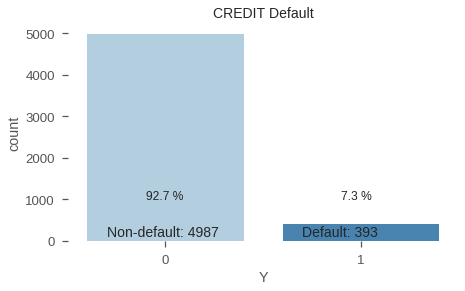

In [15]:
## Default frequency

n_customer=len(data)
n_default=data.Y.sum()

n_no_default=n_customer-n_default

##percentage 

default_perc=round(n_default/n_customer*100,1)
no_default_perc=round(n_no_default/n_customer*100,1)


##Plotting
import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Y',data=data, palette="Blues")
plt.annotate('Non-default: {}'.format(n_no_default), xy=(-0.3, 120), xytext=(-0.3, 120), size=14)
plt.annotate('Default: {}'.format(n_default),  xy=(0.7, 120), xytext=(0.7, 120), size=14)
plt.annotate(str(no_default_perc)+" %", xy=(-0.3, 1000), xytext=(-0.1, 1000), size=12)
plt.annotate(str(default_perc)+" %", xy=(0.7, 1000), xytext=(0.9, 1000), size=12)
plt.title('CREDIT Default', size=14)
# #Removing the frame
plt.box(False);

We're dealing with unbalanced data 

In [16]:
import time
import datetime 

def date_to_timestamp(s):
    return datetime.datetime.strptime(s,"%d/%m/%Y").year
data["age_open"]=data.Prod_Decision_Date.apply(date_to_timestamp)-data.BirthDate.apply(date_to_timestamp)

# data["contrat_duration"]=data.Prod_Closed_Date.apply(date_to_timestamp)-data.Prod_Decision_Date.apply(date_to_timestamp)

age_open:the age he was at the open of the contrat ( number of years)
contrat_duration : the duration of the contrat ( number of years) ( problem of NAN ? how to apply function only on non Nan data)

In [17]:
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

                      count     mean      std   min     25%     50%      75%     max
Id_Customer          5380.0  4784.54  2781.44   1.0  2368.5  4762.5  7180.25  9605.0
Y                    5380.0     0.07     0.26   0.0     0.0     0.0     0.00     1.0
Number_Of_Dependant  5378.0     1.06     1.34   0.0     0.0     0.0     2.00    20.0
Years_At_Residence   5380.0    12.63     9.97   0.0     4.0    10.0    18.00    70.0
Years_At_Business    5378.0     4.27     7.23   0.0     1.0     1.0     4.00    98.0
Nb_Of_Products       5380.0     1.09     0.30   1.0     1.0     1.0     1.00     3.0
age_open             5380.0    39.62    10.98  21.0    30.0    38.0    48.00    75.0


In [19]:
data[205:215]

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category,age_open
205,2927,0,Existing Client,29/09/1989,08/11/2010,NP_Client,University,Single,0.0,20,24,0.0,C,21/09/2011,Branch,Owned,1,09/01/2013,J,22
206,6037,0,Existing Client,04/09/1964,14/05/2009,NP_Client,University,Married,0.0,10,36,1.0,C,19/01/2012,Sales,Owned,2,04/03/2013,B,48
207,8183,0,Non Existing Client,26/10/1981,27/02/2012,NP_Client,University,Married,0.0,1,36,1.0,C,28/02/2012,Sales,Owned,1,NaN,B,31
208,4983,0,Non Existing Client,19/09/1956,15/11/2011,NP_Client,University,Married,3.0,57,240,11.0,C,17/11/2011,Branch,Owned,1,NaN,B,55
209,3240,0,Non Existing Client,30/11/1984,05/09/2011,NP_Client,Secondary or Less,Single,0.0,16,21,3.0,C,18/09/2011,Branch,Owned,1,NaN,B,27
210,6302,0,Non Existing Client,20/05/1973,25/12/2011,NP_Client,University,Married,0.0,15,30,1.0,C,03/01/2012,Sales,Owned,1,NaN,D,39
211,5651,0,Non Existing Client,16/09/1988,11/12/2011,NP_Client,University,Single,0.0,1,36,1.0,C,12/12/2011,Sales,Owned,1,NaN,B,23
212,735,0,Non Existing Client,01/02/1972,29/05/2011,NP_Client,Master/PhD,Married,3.0,2,18,1.0,C,30/05/2011,Sales,Owned,1,NaN,B,39
213,6045,0,Existing Client,20/03/1979,08/07/2009,NP_Client,University,Married,0.0,10,36,3.0,C,05/01/2012,Sales,Owned,2,04/02/2013,B,33
214,636,0,Existing Client,15/02/1985,30/05/2010,P_Client,University,Single,0.0,20,"39,6",2.0,C,12/06/2011,Branch,Old rent,1,NaN,G,26


In [20]:
categ_names=["Customer_Type","P_Client","Educational_Level","Marital_Status","Prod_Sub_Category","Source","Type_Of_Residence","Prod_Category"]

for name in categ_names:
    print(name,":",data[name].unique())

Customer_Type : ['Non Existing Client' 'Existing Client']
P_Client : ['NP_Client' 'P_Client']
Educational_Level : ['University' 'Master/PhD' 'Secondary or Less' 'Diploma']
Marital_Status : ['Married' 'Single' 'Widowed' 'Divorced' 'Separated']
Prod_Sub_Category : ['C' 'P' 'G']
Source : ['Sales' 'Branch']
Type_Of_Residence : ['Owned' 'Parents' 'New rent' 'Old rent' 'Company']
Prod_Category : ['B' 'G' 'L' 'D' 'C' 'E' 'K' 'M' 'H' 'J' 'A' 'F' 'I']


In [21]:
sorted(['Married' ,'Single', 'Widowed' ,'Divorced' ,'Separated'])

['Divorced', 'Married', 'Separated', 'Single', 'Widowed']

In [22]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

for name in categ_names:
    data[name]=lb_make.fit_transform(data[name])

In [23]:
data[205:215]

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category,age_open
205,2927,0,0,29/09/1989,08/11/2010,0,3,3,0.0,20,24,0.0,0,21/09/2011,0,3,1,09/01/2013,9,22
206,6037,0,0,04/09/1964,14/05/2009,0,3,1,0.0,10,36,1.0,0,19/01/2012,1,3,2,04/03/2013,1,48
207,8183,0,1,26/10/1981,27/02/2012,0,3,1,0.0,1,36,1.0,0,28/02/2012,1,3,1,NaN,1,31
208,4983,0,1,19/09/1956,15/11/2011,0,3,1,3.0,57,240,11.0,0,17/11/2011,0,3,1,NaN,1,55
209,3240,0,1,30/11/1984,05/09/2011,0,2,3,0.0,16,21,3.0,0,18/09/2011,0,3,1,NaN,1,27
210,6302,0,1,20/05/1973,25/12/2011,0,3,1,0.0,15,30,1.0,0,03/01/2012,1,3,1,NaN,3,39
211,5651,0,1,16/09/1988,11/12/2011,0,3,3,0.0,1,36,1.0,0,12/12/2011,1,3,1,NaN,1,23
212,735,0,1,01/02/1972,29/05/2011,0,1,1,3.0,2,18,1.0,0,30/05/2011,1,3,1,NaN,1,39
213,6045,0,0,20/03/1979,08/07/2009,0,3,1,0.0,10,36,3.0,0,05/01/2012,1,3,2,04/02/2013,1,33
214,636,0,0,15/02/1985,30/05/2010,1,3,3,0.0,20,"39,6",2.0,0,12/06/2011,0,2,1,NaN,6,26


label_encoder-> ordre alphabétique

8


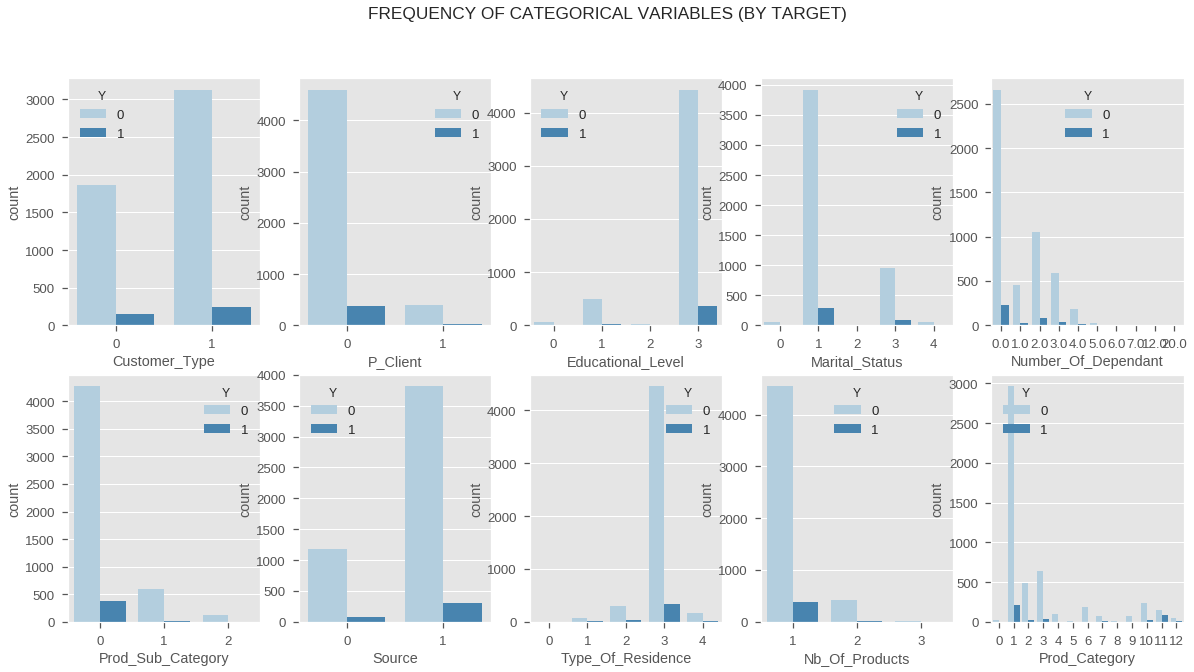

In [24]:
# Creating a new dataframe with categorical variables
subset = data[categ_names]

print(len(categ_names))

f, axes = plt.subplots(2, 5, figsize=(20, 10), facecolor='white')
i=0

f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1= sns.countplot(x="Customer_Type", hue="Y", data=data, palette="Blues", ax=axes[0,0])

ax2= sns.countplot(x="P_Client", hue="Y", data=data, palette="Blues", ax=axes[0,1])

ax3= sns.countplot(x="Educational_Level", hue="Y", data=data, palette="Blues", ax=axes[0,2])

ax4= sns.countplot(x="Marital_Status", hue="Y", data=data, palette="Blues", ax=axes[0,3])

ax5= sns.countplot(x="Number_Of_Dependant", hue="Y", data=data, palette="Blues", ax=axes[0,4])
ax6= sns.countplot(x="Prod_Sub_Category", hue="Y", data=data, palette="Blues", ax=axes[1,0])
ax7= sns.countplot(x="Source", hue="Y", data=data, palette="Blues", ax=axes[1,1])
ax8= sns.countplot(x="Type_Of_Residence", hue="Y", data=data, palette="Blues", ax=axes[1,2])
ax9= sns.countplot(x="Nb_Of_Products", hue="Y", data=data, palette="Blues", ax=axes[1,3])

ax10= sns.countplot(x="Prod_Category", hue="Y", data=data, palette="Blues", ax=axes[1,4])

We have 5380 client
most of them are categorized by the company as **NP_Client**
custumer type is note so unbalanced, with existing client in majority. 
the average age of openning is **open account 30 years ago**, so they have been member for a long time
Their education level is **mostly university**, 
they are **mostly married**, **own their house** , and few are single, the others are very low
we can see that the product that most of them are interested in is the **G**, and subcaterogy 


In [7]:
import pandas_profiling as pp

In [66]:
pp.ProfileReport(df)

In [46]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split # to split the data into two parts
import matplotlib.pyplot as plt

%matplotlib inline

try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [65]:
df.values.any()

1

0       36.00
1       18.00
2       36.00
3       36.00
4       36.00
        ...  
5375    36.00
5376    24.82
5377    14.40
5378    36.00
5379    30.00
Name: Net_Annual_Income, Length: 5374, dtype: float64

In [120]:
df = data.drop("Id_Customer", axis=1)
df = df.drop("Prod_Closed_Date", axis=1)
df = df.drop("BirthDate", axis=1)
df = df.drop("Customer_Open_Date", axis=1)
df = df.drop("Prod_Decision_Date", axis=1)
df = df.drop("age_open", axis=1)
df = df.dropna()

y = df.Y
X = df.drop("Y", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [122]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [123]:
X.columns

Index(['Customer_Type', 'P_Client', 'Educational_Level', 'Marital_Status', 'Number_Of_Dependant',
       'Years_At_Residence', 'Net_Annual_Income', 'Years_At_Business', 'Prod_Sub_Category',
       'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Category'],
      dtype='object')

In [127]:
params = {
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1
}
evals_result = {}  # to record eval results for plotting
cc = ['Customer_Type', 'P_Client', 'Educational_Level', 'Marital_Status', 'Number_Of_Dependant',
       'Years_At_Residence', 'Net_Annual_Income', 'Years_At_Business', 'Prod_Sub_Category',
       'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Category']

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=cc,
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

[10]	training's l1: 0.129014	training's l2: 0.0631228	valid_1's l1: 0.130494	valid_1's l2: 0.0647887
[20]	training's l1: 0.126258	training's l2: 0.0619226	valid_1's l1: 0.128543	valid_1's l2: 0.0646129
[30]	training's l1: 0.125057	training's l2: 0.061318	valid_1's l1: 0.12783	valid_1's l2: 0.064632
[40]	training's l1: 0.124268	training's l2: 0.0608482	valid_1's l1: 0.127517	valid_1's l2: 0.0646631
[50]	training's l1: 0.12354	training's l2: 0.0603046	valid_1's l1: 0.127486	valid_1's l2: 0.0646427
[60]	training's l1: 0.123195	training's l2: 0.0599575	valid_1's l1: 0.127459	valid_1's l2: 0.0645834
[70]	training's l1: 0.122964	training's l2: 0.0596801	valid_1's l1: 0.127655	valid_1's l2: 0.0647329
[80]	training's l1: 0.122587	training's l2: 0.0593339	valid_1's l1: 0.127644	valid_1's l2: 0.0646911
[90]	training's l1: 0.122358	training's l2: 0.059076	valid_1's l1: 0.127709	valid_1's l2: 0.0647581
[100]	training's l1: 0.122037	training's l2: 0.0587832	valid_1's l1: 0.127807	valid_1's l2: 0.06

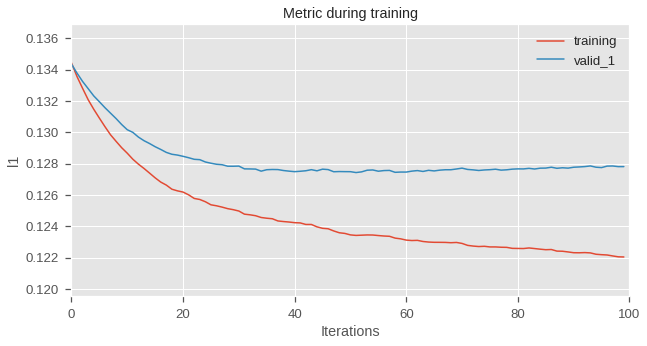

In [129]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()
    
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'])
else:
    render_metric(params['metric'][0])

In [130]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

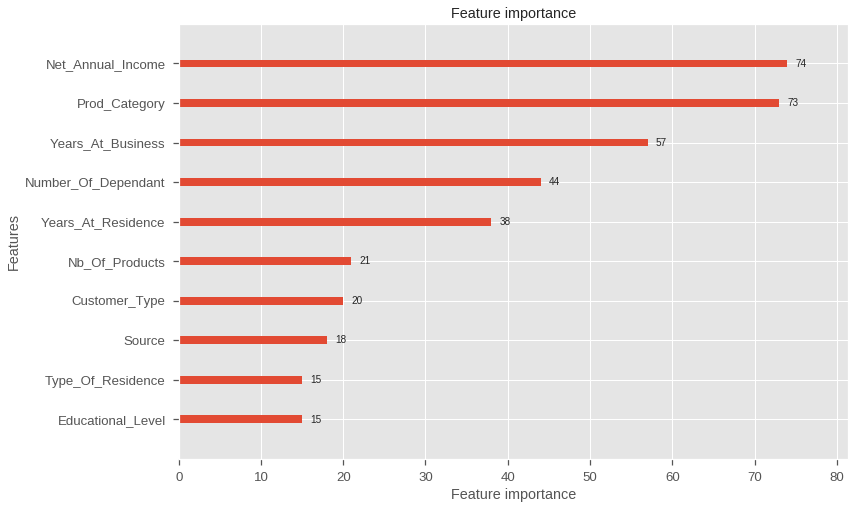

In [131]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

In [132]:
def render_tree(tree_index, show_info, precision=3):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)

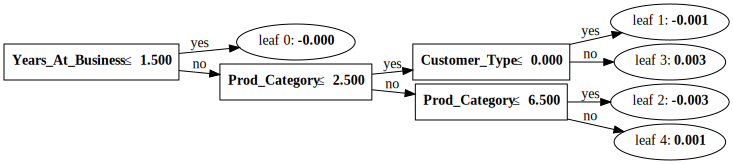

In [133]:
if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(render_tree,
             tree_index=(0, gbm.num_trees() - 1),
             show_info=SelectMultiple(  # allow multiple values to be selected
                 options=['None',
                          'split_gain',
                          'internal_value',
                          'internal_count',
                          'internal_weight',
                          'leaf_count',
                          'leaf_weight',
                          'data_percentage'],
                 value=['None']),
             precision=(0, 10))
    tree = None
else:
    tree = render_tree(53, ['None'])
tree

LGBM Categorial data

In [153]:
m_df = pd.read_csv("./data/CreditTraining.csv")
m_df = m_df.drop("Id_Customer", axis=1)
m_df = m_df.drop("Prod_Closed_Date", axis=1)
m_df = m_df.drop("BirthDate", axis=1)
m_df = m_df.drop("Customer_Open_Date", axis=1)
m_df = m_df.drop("Prod_Decision_Date", axis=1)
m_df = m_df.dropna()
m_df.Net_Annual_Income = m_df.Net_Annual_Income.replace({',': '.'}, regex=True).astype(float)

categ_names=["Customer_Type","P_Client","Educational_Level","Marital_Status","Prod_Sub_Category","Source","Type_Of_Residence","Prod_Category"]
for cname in categ_names:
    m_df[cname] = m_df[cname].astype('category')

In [156]:
params = {
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1
}

In [157]:
y = m_df.Y
X = m_df.drop("Y", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [158]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [159]:
evals_result = {}  # to record eval results for plotting
cc = ['Customer_Type', 'P_Client', 'Educational_Level', 'Marital_Status', 'Number_Of_Dependant',
       'Years_At_Residence', 'Net_Annual_Income', 'Years_At_Business', 'Prod_Sub_Category',
       'Source', 'Type_Of_Residence', 'Nb_Of_Products', 'Prod_Category']
        
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=cc,
                categorical_feature=categ_names,
                evals_result=evals_result,
                verbose_eval=10)

[10]	training's l1: 0.128491	training's l2: 0.0627986	valid_1's l1: 0.130605	valid_1's l2: 0.0647315
[20]	training's l1: 0.125654	training's l2: 0.0615337	valid_1's l1: 0.128423	valid_1's l2: 0.0642389
[30]	training's l1: 0.124239	training's l2: 0.0608895	valid_1's l1: 0.127396	valid_1's l2: 0.064208
[40]	training's l1: 0.123471	training's l2: 0.0604991	valid_1's l1: 0.127054	valid_1's l2: 0.0642154
[50]	training's l1: 0.123109	training's l2: 0.0601567	valid_1's l1: 0.126951	valid_1's l2: 0.0641342
[60]	training's l1: 0.122945	training's l2: 0.059882	valid_1's l1: 0.12716	valid_1's l2: 0.0642069
[70]	training's l1: 0.122677	training's l2: 0.0595563	valid_1's l1: 0.127216	valid_1's l2: 0.0641596
[80]	training's l1: 0.12257	training's l2: 0.0592855	valid_1's l1: 0.127581	valid_1's l2: 0.0641798
[90]	training's l1: 0.122466	training's l2: 0.0590501	valid_1's l1: 0.127811	valid_1's l2: 0.0641248
[100]	training's l1: 0.122211	training's l2: 0.0587938	valid_1's l1: 0.127712	valid_1's l2: 0.0

In [160]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

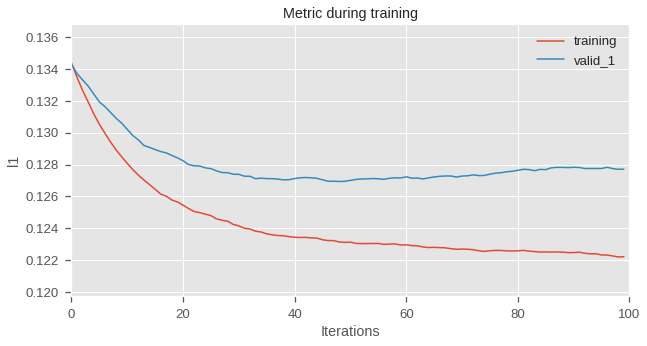

In [161]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'])
else:
    render_metric(params['metric'][0])

In [162]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

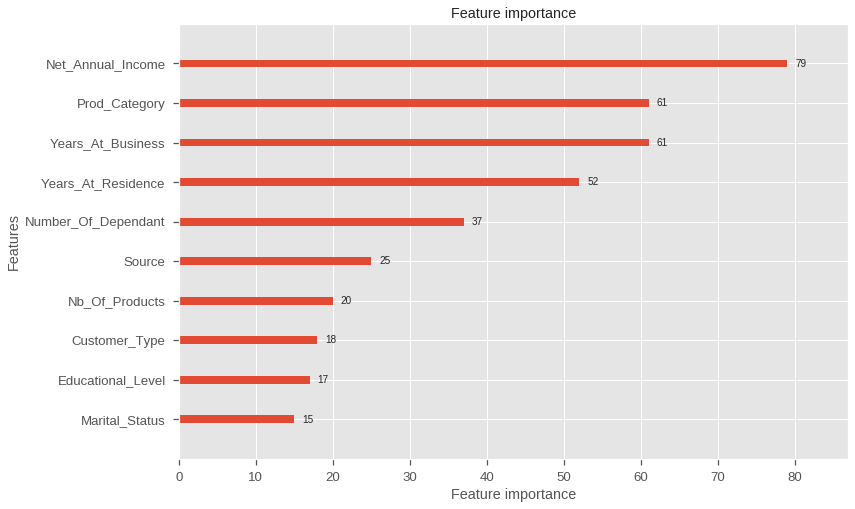

In [163]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

In [164]:
def render_tree(tree_index, show_info, precision=3):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)

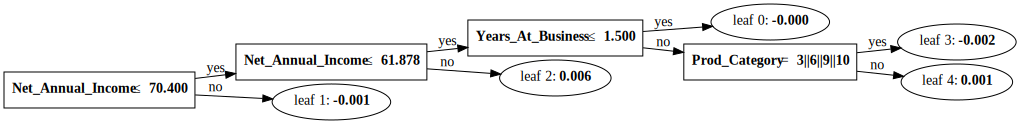

In [165]:
if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(render_tree,
             tree_index=(0, gbm.num_trees() - 1),
             show_info=SelectMultiple(  # allow multiple values to be selected
                 options=['None',
                          'split_gain',
                          'internal_value',
                          'internal_count',
                          'internal_weight',
                          'leaf_count',
                          'leaf_weight',
                          'data_percentage'],
                 value=['None']),
             precision=(0, 10))
    tree = None
else:
    tree = render_tree(53, ['None'])
tree